In [2]:
# Arquitectura Avanzada CNN
import tensorflow as tf
import tensorflow_datasets as tfds

#Setear el nivel de log
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Variables
datos_train, datos_test = datos['train'], datos['test']

#Norm
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255
    return imagenes, etiquetas

#Normalizar los datos de entrenamiento y test
datos_entrenamiento = datos_train.map(normalizar)
datos_prueba = datos_test.map(normalizar)

clases = ['0','1','2','3','4','5','6','7','8','9']


2024-02-01 12:07:41.059576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 12:07:41.306057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 12:07:41.306189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 12:07:41.336097: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 12:07:41.408728: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 12:07:41.411034: I tensorflow/core/platform/cpu_feature_guard.cc:1

2024-02-01 12:07:51.551090: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


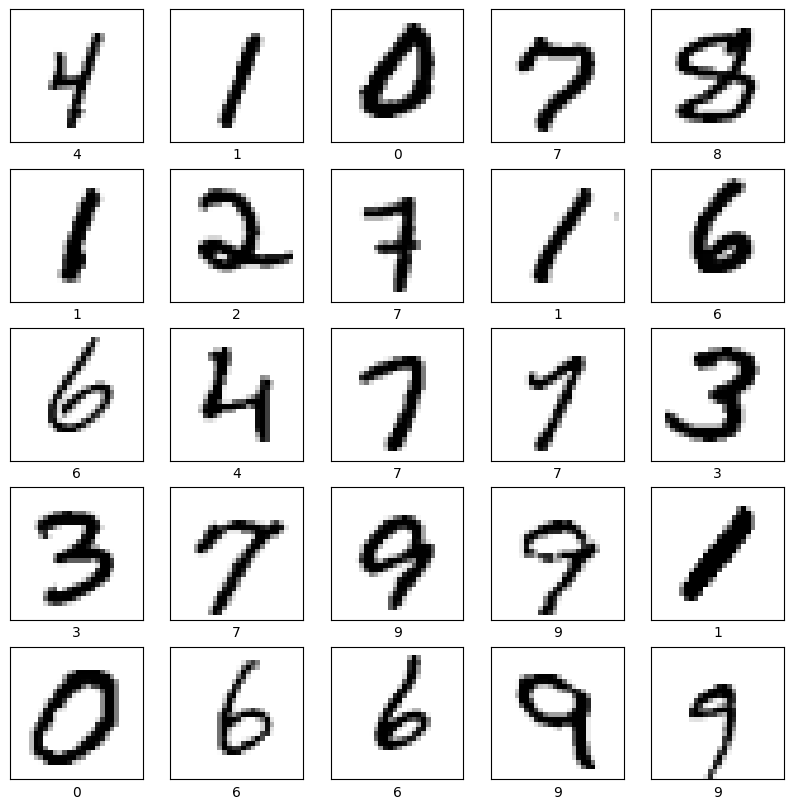

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()

In [4]:
# Creamos CNN

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Añadir Dropout
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Añadir Regularización L2
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax') 
])

#Compilamos el modelo
modelo.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
num_datos_entrenamiento = metadatos.splits['train'].num_examples
num_datos_prueba = metadatos.splits['test'].num_examples

print(num_datos_entrenamiento)
print(num_datos_prueba)

#LOTES
LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(LOTE)
datos_prueba = datos_prueba.batch(LOTE)

60000
10000


In [6]:
# Realizamos el entrenamiento
import math

historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_datos_entrenamiento/LOTE))

Epoch 1/5


1875/1875 [==============================] - 53s 25ms/step - loss: 0.5527 - accuracy: 0.9046
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3475 - accuracy: 0.9485
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3235 - accuracy: 0.9528
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3046 - accuracy: 0.9592
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2973 - accuracy: 0.9593


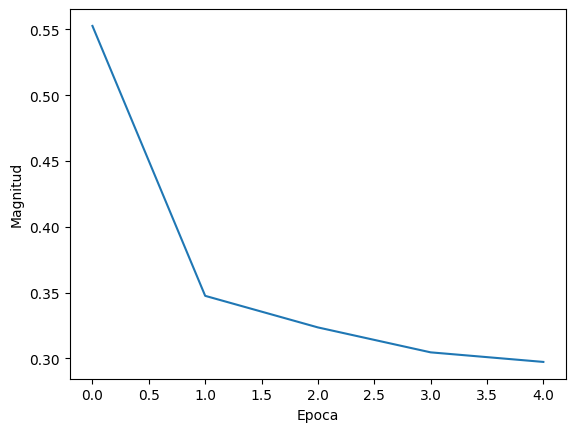

In [7]:
plt.xlabel("Epoca")
plt.ylabel("Magnitud")
plt.plot(historial.history["loss"])

In [8]:
#Exportamos el modelo
modelo.save('numeros_conv.h5')

#Conertimos a tensorflow.js
import tensorflowjs as tfjs

!tensorflowjs_converter --input_format keras numeros_conv.h5 carpeta_salida

/home/albertocastrovill/Documents/UDEM/IA2/IA2_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2024-02-01 12:12:19.377068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 12:12:19.377211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 12:12:19.411242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 12:12:22.545925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
#Vemos el contenido de la carpeta

!ls carpeta_salida

group1-shard1of1.bin  model.json
